## <font color='blue'>AutoML em Python</font>
# <font color='blue'>Machine Learning - Processo Manual da Execução Passo a Passo</font>



## Processo Tradicional de Machine Learning - Parte 2 - Modelos de Classificação com Redes Neurais Artificias - Keras + tensorflow


## Fonte de Dados

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

## Instalando e Carregando Pacotes

In [1]:
#!pip install -U tensorflow

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q watermark

In [4]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ricardo Roberto de Lima" --iversions

Author: Ricardo Roberto de Lima

numpy     : 1.18.1
sklearn   : 0.0
seaborn   : 0.10.0
matplotlib: 3.1.3
pandas    : 1.0.1
tensorflow: 2.3.4



## Carga e Exploração dos Dados

In [6]:
# Carrega os dados
dataset = fetch_california_housing()

In [7]:
# Elementos dos dados
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
# Converte em dataframe
dados = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [9]:
# Extrai a variável target
target = pd.Series(dataset.target, name = 'MedPrice')

In [10]:
# Shape
dados.shape

(20640, 8)

In [11]:
# Tipos de dados
dados.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [12]:
# Visualiza
dados.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
# Resumo estatístico
pd.options.display.float_format = '{:,.2f}'.format
dados.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


In [14]:
# Verificando valores nulos
dados.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [15]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dados, target, test_size = 0.2, random_state = 42)

In [16]:
# Shape
print("Shape Atributos em Treino: {}".format(X_treino.shape))
print("Shape Target em Treino: {}".format(y_treino.shape))
print("Shape Atributos em Teste: {}".format(X_teste.shape))
print("Shape Target em Teste: {}".format(y_teste.shape))

Shape Atributos em Treino: (16512, 8)
Shape Target em Treino: (16512,)
Shape Atributos em Teste: (4128, 8)
Shape Target em Teste: (4128,)


## Pré-Processameto dos Dados

In [17]:
# Função para padronizar os dados
def padroniza_dados(x, mean, std):
    return (x - mean) / std

In [18]:
# Calcula média e desvio padrão nos dados de entrada em treino
mean = X_treino.mean(axis = 0)
std = X_treino.std(axis = 0)

> Aplicamos a padronização somente aos dados de entrada em treino e teste

In [19]:
# Padroniza os dados
dados_treino_pad = padroniza_dados(X_treino, mean, std)
dados_teste_pad = padroniza_dados(X_teste, mean, std)

In [20]:
# Seed
tf.random.set_seed(42)

## Modelagem 1

In [21]:
# Modelo
modelo = keras.Sequential([layers.Dense(64, activation = 'relu', input_shape = [8]),
                           layers.Dense(64, activation = 'relu'),
                           layers.Dense(1)])

In [22]:
# Sumário
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Criamos o otimizador com taxa de aprendizado de 0.01
optimizer = tf.keras.optimizers.RMSprop(0.01)

In [24]:
# Compilamos o modelo
modelo.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae', 'mse'])

In [25]:
# Treinamento
history = modelo.fit(dados_treino_pad, 
                     y_treino,
                     validation_split = 0.2,
                     epochs = 300, 
                     batch_size = 1024, 
                     verbose = 1)

Epoch 1/300
13/13 [==============================] - 0s 28ms/step - loss: 1.3599 - mae: 0.8184 - mse: 1.3599 - val_loss: 0.7208 - val_mae: 0.6364 - val_mse: 0.7208
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6281 - mae: 0.5736 - mse: 0.6281 - val_loss: 0.7931 - val_mae: 0.6257 - val_mse: 0.7931
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5737 - mae: 0.5461 - mse: 0.5737 - val_loss: 0.5906 - val_mae: 0.5855 - val_mse: 0.5906
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4936 - mae: 0.5089 - mse: 0.4936 - val_loss: 0.7430 - val_mae: 0.6018 - val_mse: 0.7430
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4937 - mae: 0.5052 - mse: 0.4937 - val_loss: 0.6445 - val_mae: 0.6059 - val_mse: 0.6445
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4748 - mae: 0.4961 - mse: 0.4748 - val_loss: 0.4668 - val_mae: 0.4682 - val_mse: 0.4668
Epoch 7/300
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 0.2986 - mae: 0.3788 - mse: 0.2986 - val_loss: 0.3357 - val_mae: 0.4223 - val_mse: 0.3357
Epoch 52/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3026 - mae: 0.3848 - mse: 0.3026 - val_loss: 0.3202 - val_mae: 0.3812 - val_mse: 0.3202
Epoch 53/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2905 - mae: 0.3759 - mse: 0.2905 - val_loss: 0.3734 - val_mae: 0.4471 - val_mse: 0.3734
Epoch 54/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2785 - mae: 0.3681 - mse: 0.2785 - val_loss: 0.2957 - val_mae: 0.3629 - val_mse: 0.2957
Epoch 55/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2860 - mae: 0.3715 - mse: 0.2860 - val_loss: 0.3161 - val_mae: 0.3831 - val_mse: 0.3161
Epoch 56/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2940 - mae: 0.3801 - mse: 0.2940 - val_loss: 0.3065 - val_mae: 0.3851 - val_mse: 0.3065
Epoch 57/300
13/13 [=========

13/13 [==============================] - 0s 3ms/step - loss: 0.2542 - mae: 0.3520 - mse: 0.2542 - val_loss: 0.2850 - val_mae: 0.3552 - val_mse: 0.2850
Epoch 102/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2436 - mae: 0.3421 - mse: 0.2436 - val_loss: 0.3194 - val_mae: 0.4134 - val_mse: 0.3194
Epoch 103/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2593 - mae: 0.3587 - mse: 0.2593 - val_loss: 0.3291 - val_mae: 0.3791 - val_mse: 0.3291
Epoch 104/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2536 - mae: 0.3504 - mse: 0.2536 - val_loss: 0.3331 - val_mae: 0.4184 - val_mse: 0.3331
Epoch 105/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2633 - mae: 0.3442 - mse: 0.2633 - val_loss: 0.3222 - val_mae: 0.3724 - val_mse: 0.3222
Epoch 106/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2493 - mae: 0.3476 - mse: 0.2493 - val_loss: 0.3130 - val_mae: 0.3982 - val_mse: 0.3130
Epoch 107/300
13/13 [===

13/13 [==============================] - 0s 4ms/step - loss: 0.2118 - mae: 0.3230 - mse: 0.2118 - val_loss: 0.3078 - val_mae: 0.3843 - val_mse: 0.3078
Epoch 200/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2006 - mae: 0.3156 - mse: 0.2006 - val_loss: 0.2969 - val_mae: 0.3600 - val_mse: 0.2969
Epoch 201/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2140 - mae: 0.3256 - mse: 0.2140 - val_loss: 0.2871 - val_mae: 0.3611 - val_mse: 0.2871
Epoch 202/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1891 - mae: 0.3031 - mse: 0.1891 - val_loss: 0.2985 - val_mae: 0.3736 - val_mse: 0.2985
Epoch 203/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2198 - mae: 0.3301 - mse: 0.2198 - val_loss: 0.3071 - val_mae: 0.3667 - val_mse: 0.3071
Epoch 204/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2007 - mae: 0.3168 - mse: 0.2007 - val_loss: 0.3040 - val_mae: 0.3866 - val_mse: 0.3040
Epoch 205/300
13/13 [===

Epoch 249/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2028 - mae: 0.3170 - mse: 0.2028 - val_loss: 0.2905 - val_mae: 0.3594 - val_mse: 0.2905
Epoch 250/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1925 - mae: 0.3106 - mse: 0.1925 - val_loss: 0.2983 - val_mae: 0.3851 - val_mse: 0.2983
Epoch 251/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2007 - mae: 0.3142 - mse: 0.2007 - val_loss: 0.3197 - val_mae: 0.3724 - val_mse: 0.3197
Epoch 252/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1981 - mae: 0.3122 - mse: 0.1981 - val_loss: 0.2787 - val_mae: 0.3574 - val_mse: 0.2787
Epoch 253/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1911 - mae: 0.3049 - mse: 0.1911 - val_loss: 0.3318 - val_mae: 0.4086 - val_mse: 0.3318
Epoch 254/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1912 - mae: 0.3111 - mse: 0.1912 - val_loss: 0.2950 - val_mae: 0.3664 - val_mse: 0.2950
Epoch 255/

Epoch 299/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1884 - mae: 0.3064 - mse: 0.1884 - val_loss: 0.2958 - val_mae: 0.3819 - val_mse: 0.2958
Epoch 300/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1728 - mae: 0.2919 - mse: 0.1728 - val_loss: 0.3112 - val_mae: 0.3917 - val_mse: 0.3112


## Avaliação do Modelo 1

In [26]:
# Avaliação
loss, mae, mse = modelo.evaluate(dados_teste_pad, y_teste, verbose = 0)

In [27]:
print(mse)

0.3264916241168976


In [28]:
# Converte o histórico de treinamento em dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

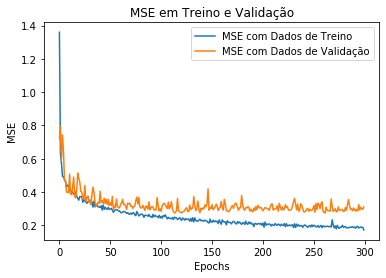

In [29]:
# Plot
plt.plot(hist['epoch'], hist['mse'], label = "MSE com Dados de Treino")
plt.plot(hist['epoch'], hist['val_mse'], label = "MSE com Dados de Validação")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE em Treino e Validação')
plt.legend()
plt.show()

## Modelagem 2

In [30]:
# Vamos treinar o modelo em menos épocas
optimizer = tf.keras.optimizers.RMSprop(0.001)
modelo.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae', 'mse'])
history = modelo.fit(dados_treino_pad, 
                     y_treino, 
                     validation_split = 0.2, 
                     epochs = 150, 
                     batch_size = 1024, 
                     verbose = 1)

Epoch 1/150
13/13 [==============================] - 0s 13ms/step - loss: 0.1584 - mae: 0.2804 - mse: 0.1584 - val_loss: 0.2748 - val_mae: 0.3534 - val_mse: 0.2748
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1518 - mae: 0.2722 - mse: 0.1518 - val_loss: 0.2761 - val_mae: 0.3516 - val_mse: 0.2761
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1506 - mae: 0.2706 - mse: 0.1506 - val_loss: 0.2761 - val_mae: 0.3526 - val_mse: 0.2761
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1500 - mae: 0.2700 - mse: 0.1500 - val_loss: 0.2767 - val_mae: 0.3524 - val_mse: 0.2767
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1497 - mae: 0.2696 - mse: 0.1497 - val_loss: 0.2790 - val_mae: 0.3554 - val_mse: 0.2790
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1496 - mae: 0.2695 - mse: 0.1496 - val_loss: 0.2790 - val_mae: 0.3553 - val_mse: 0.2790
Epoch 7/150
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 0.1417 - mae: 0.2624 - mse: 0.1417 - val_loss: 0.2897 - val_mae: 0.3602 - val_mse: 0.2897
Epoch 100/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1418 - mae: 0.2628 - mse: 0.1418 - val_loss: 0.2904 - val_mae: 0.3604 - val_mse: 0.2904
Epoch 101/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1417 - mae: 0.2627 - mse: 0.1417 - val_loss: 0.2887 - val_mae: 0.3580 - val_mse: 0.2887
Epoch 102/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1417 - mae: 0.2622 - mse: 0.1417 - val_loss: 0.2894 - val_mae: 0.3611 - val_mse: 0.2894
Epoch 103/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1415 - mae: 0.2624 - mse: 0.1415 - val_loss: 0.2903 - val_mae: 0.3594 - val_mse: 0.2903
Epoch 104/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1416 - mae: 0.2623 - mse: 0.1416 - val_loss: 0.2915 - val_mae: 0.3610 - val_mse: 0.2915
Epoch 105/150
13/13 [===

Epoch 149/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1396 - mae: 0.2610 - mse: 0.1396 - val_loss: 0.2930 - val_mae: 0.3593 - val_mse: 0.2930
Epoch 150/150
13/13 [==============================] - 0s 3ms/step - loss: 0.1396 - mae: 0.2607 - mse: 0.1396 - val_loss: 0.2963 - val_mae: 0.3620 - val_mse: 0.2963


## Avaliação do Modelo 2

In [31]:
# Avalia o modelo
loss, mae, mse = modelo.evaluate(dados_teste_pad, y_teste, verbose = 0)

In [32]:
print(mse)

0.30958572030067444


In [33]:
# Converte o histórico de treinamento em dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

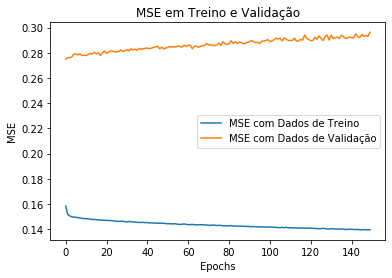

In [34]:
# Plot
plt.plot(hist['epoch'], hist['mse'], label = "MSE com Dados de Treino")
plt.plot(hist['epoch'], hist['val_mse'], label = "MSE com Dados de Validação")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE em Treino e Validação')
plt.legend()
plt.show()

# Finalizar processo